## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
%matplotlib inline 
import geopandas as gdp

## Import dataset

In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.shape

(12043, 23)

There are 12,0403 rows of transactions by 23 columns of data

## Transaction Insights
### Average transaction amount across 3 months

In [3]:
# Obtain the average transaction amount from total transaction
df['amount'].mean()

187.93358797641784

### Average transaction number per month

In [4]:
# Average transaction number per month
month_df = df.groupby(df['date'].dt.strftime("%b")).count()
month_df = month_df.drop(['date'],axis=1).reset_index()

# Re-arrange month in ascending order
month_df['month'] = pd.Categorical(month_df['date'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
month_df = month_df.sort_values("month").reset_index()

# Extract only date and transaction count
month_df = month_df[['date','status']]

In [5]:
# Extract values to be plotted in bar chart
month_list = month_df['date'].values.tolist()
status_list = month_df['status'].values.tolist()

### Average transaction amount per month

In [6]:
# Average transaction amount per month
month_amount_df =  df.groupby(df['date'].dt.strftime("%b")).mean().reset_index()

# Re-arrange month in ascending order
month_amount_df['month'] = pd.Categorical(month_amount_df['date'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
month_amount_df = month_amount_df.sort_values("month").reset_index()

# Extract values to be plotted in bar chart
amount_list = month_amount_df['amount'].values.tolist()

#### Text label function

In [7]:
# Attaches a text label above each bar 
def autolabel_1(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',color=color1)

# Attaches a text label above each bar 
def autolabel_2(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('${:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',color=color2)

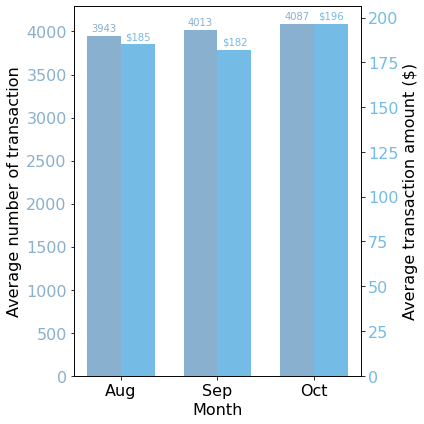

In [9]:
# Plot of dual bar graph
fig, ax1 = plt.subplots(figsize=(6,6))

N = 3
x = np.arange(N)
width = 0.35

# Bar colors
color1 = '#89b0ce'
color2 = "#74bbe5"

# First bar graph
rects1 = ax1.bar(x - width/2, status_list, width,color=color1)
# Second bar graph
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, amount_list, width,color=color2)

# Fine tune display parameters
ax1.set_xlabel('Month')
ax1.set_ylabel('Average number of transaction')
ax1.tick_params(axis='y',labelcolor=color1)
ax2.set_ylabel('Average transaction amount ($)')
ax2.tick_params(axis='y',labelcolor=color2)
ax2.set_xticks(x)
ax2.set_xticklabels(month_list)

ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax1.xaxis.label.set_size(16)
ax1.yaxis.label.set_size(16)
ax2.yaxis.label.set_size(16)

# Using function to display value at top of bar graph
autolabel_1(rects1)
autolabel_2(rects2)
fig.tight_layout()

plt.show()

### Movement Type Insight

In [24]:
# Obtain movement count 
movement_df = df.groupby('movement',as_index=False).count()
movement_df = movement_df[['movement','status']]

# Obtain movement percentage
movement_df['status'] = movement_df['status']/movement_df['status'].sum()

In [25]:
# Extract values to be plotted
movement_type = movement_df['movement'].values.tolist()
movement_value = movement_df['status'].values.tolist()

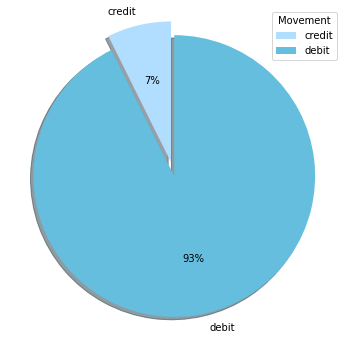

In [31]:
# Plotting the pie chart

explode = (0,0.1)
colors = ['#b1ddff','#66bede']

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(movement_value, explode=explode, labels=movement_type, autopct='%1.0f%%',
        shadow=True, startangle=90,colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Movement')
plt.show()

In [32]:
# Obtaining average amount spent based on movement
movement_avg = df.groupby('movement',as_index=False)['amount'].mean()
movement_avg

,movement,amount
0,credit,1898.728029
1,debit,52.572343


### Transaction Type Insights

In [57]:
# Transaction df to obtain count based on group
txn_df = df.groupby(df['txn_description']).count().reset_index()
txn_df = txn_df[['txn_description','status']].sort_values(by=['status'])

In [58]:
# Extract values to be plotted
txn_key = txn_df['txn_description'].values.tolist()
txn_value = txn_df['status'].values.tolist()

In [59]:
# Extract only Phone Bank txn_description transactions
phone_bank_df = df[df['txn_description'] == 'PHONE BANK']
# Age group split into 4 bins and normalized to get percentage
phone_bank_age = phone_bank_df.age.value_counts(bins=4,normalize=True)

In [60]:
phone_bank_age

(17.939, 33.0]    0.603960
(33.0, 48.0]      0.336634
(48.0, 63.0]      0.029703
(63.0, 78.0]      0.029703
Name: age, dtype: float64

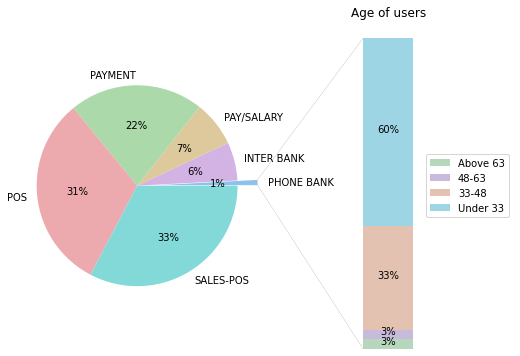

In [61]:
# Make figure and assign axis objects
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# Plotting pie chart
colors = ["#8cc3ec","#d3b3e3","#ddc99b","#acd9aa","#ecaaae","#82d9d8"]
explode = [0.2, 0, 0,0,0,0]
ax1.pie(txn_value, autopct='%1.0f%%', startangle=0,
        labels=txn_key, explode=explode,labeldistance=1.1,colors=colors)

# Bar chart parameters
xpos = 0
bottom = 0
ratios = [.03, .03, .33, .60] # Ratio of phone_bank users are manually input from phone_bank_age
width = .2
colors = ["#b7d7bd","#c7badb","#e3c2b1","#9dd5e5"]

# Plotting bar chart
for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')
    
ax2.set_title('Age of users')
ax2.legend(('Above 63', '48-63', '33-48', 'Under 33'),loc=7) # Bins are manually input from phone_bank_age
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# Use ConnectionPatch to draw lines between the two plots
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# Draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(0.1)
ax2.add_artist(con)

# Draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(0.1)

plt.show()

## Merchant Demographic

In [92]:
# Drop duplicate merchants
unique_merchant = df.drop_duplicates(subset=['merchant_long_lat'])

# Groupby merchant state
merchant_df = unique_merchant.groupby('merchant_state',as_index=False).count()
merchant_df = merchant_df[['merchant_state','status']]

In [93]:
# Number of unique merchants
merchant_df.sum()

merchant_state    ACTNSWNTQLDSATASVICWA
status                             2703
dtype: object

In [94]:
# Extract values to be plotted
merchant_state = merchant_df['merchant_state'].values.tolist()
merchant_count = merchant_df['status'].values.tolist()

In [95]:
# Obtaining map_df
# This data is obtained from 
# https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1270.0.55.003June%202020?OpenDocument
fp = "LGA_2020_AUST.shp"
map_df = gdp.read_file(fp)

In [96]:
# Renaming column
map_df = map_df.rename(columns={"STE_NAME16":"state"})
# Replacing state name to abbreviation
map_df['state'].replace({"New South Wales":"NSW","Victoria":"VIC","Queensland":"QLD","South Australia":"SA","Western Australia":"WA","Tasmania":"TAS","Northern Territory":"NT","Australian Capital Territory":"ACT","Other Territories":"Other"},inplace=True)

In [97]:
# Merging merchant_df and map_df
merged = map_df.merge(merchant_df, left_on='state',right_on='merchant_state')

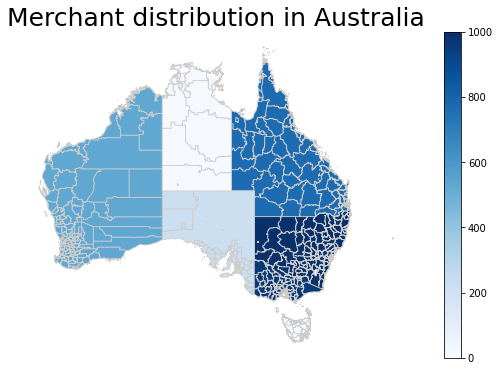

In [98]:
# Plotting Choropleth based on number of merchant 
variable = "status"
# Set the range for the choropleth
vmin, vmax = 0, 1000
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 6))
# Create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# Remove axis
ax.axis('off')
# Add a title
ax.set_title('Merchant distribution in Australia', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbar = fig.colorbar(sm)
# Saving as image
fig.savefig('map_export.png', dpi=300)

In [99]:
merchant_df.sort_values('status')

,merchant_state,status
0,ACT,38
5,TAS,45
2,NT,48
4,SA,188
7,WA,402
3,QLD,563
6,VIC,697
1,NSW,722
